# Анализ продаж видеоигр. 

## Цель исследования.  

Выявить факторы, определяющие успешность игры для последующего планирования рекламных кампаний.

## План исследования.
* Предобработка данных
  - Знакомство с данными, определение необходимых шагов
  - Работа с пропусками
  - Работа с типами данных
* Исследовательский анализ данных
* Составление портретов пользователей по регионам
* Проверка гипотез 
  - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
  - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Описание данных

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Исследование.
### Предобработка данных.  

Открою датасет, посмотрю на данные и определю содержимое столбцов, оценю количество пропусков по каждому столбцу.

In [1]:
#импорт библиотек 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats as st
pd.set_option('chained_assignment', None)

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.isna().sum().sort_values(ascending = False)

Critic_Score       8578
Rating             6766
User_Score         6701
Year_of_Release     269
Name                  2
Genre                 2
Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
dtype: int64

In [5]:
data.duplicated().sum()

0

**Описание данных исходя из документации:**

Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы проданных копий)  
EU_sales — продажи в Европе (миллионы проданных копий)  
JP_sales — продажи в Японии (миллионы проданных копий)  
Other_sales — продажи в других странах (миллионы проданных копий)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Всего строк: 16715

Этапы подготовки данных: 
  - Переименование столбцов (нижний регистр)
  - Поиск неявных дубликатов в столбцах с текстовыми данными (platform, genre)
  - Изменение типов столбцов (year_of_release)
  - Работа с пропусками с фокусом на сохранение максимального количества строк
  - Дополнение данных столбцом с суммарными продажами 

In [6]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
data['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

Дубликаты отсутствуют.

In [8]:
data['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

Дубликаты отсутствуют. Приступлю к работе с пропусками.

Начну со строк, у которых отсутствует название игры и/или жанр.

In [9]:
data[data['name'].isna()==True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в названиях и в жанрах содержат одни и те же две игры. По ним также отсутствуют рейтинги.

Удаляем - эти данные не восстановить.

In [10]:
data=data.dropna(subset = ['name']).reset_index(drop=True)
data.isna().sum().sort_values(ascending = False)

critic_score       8576
rating             6764
user_score         6699
year_of_release     269
name                  0
platform              0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

Теперь к году релиза. Имеет смысл заполнить медианным годом для игр каждой конкретной платформы. 

Для начала посмотрю на пропуски. Нет ли какой-то системы?

In [11]:
data[data['year_of_release'].isna() == True].head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
677,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
718,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
804,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Среди этих игр есть мультиплатформенные. Игры могут выходить на разных платформах в разные годы. Поэтому заполню медианным для каждой конкретной игры на прочих платформах.

In [12]:
empty_year_games = data[data['year_of_release'].isna() == True]['name'].tolist()
multiplatform_games_df = data['name'].value_counts().to_frame('counts').rename_axis('name').reset_index()
multiplatform_games_df = multiplatform_games_df.loc[multiplatform_games_df['counts']>1]
multiplatform_games = multiplatform_games_df['name'].tolist()

for game_name in empty_year_games:
    if game_name in multiplatform_games:
        median = data[(data['year_of_release'].isna() == False) & (data['name'] == game_name)]['year_of_release'].median()
        data.loc[(data['name'] == game_name) & (data['year_of_release'].isna() == True),'year_of_release'] = median
    
data.isna().sum().sort_values(ascending = False)

critic_score       8576
rating             6764
user_score         6699
year_of_release     146
name                  0
platform              0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

Значит, остальные игры с пропусками в годе выхода выходили только на одной платформе. Достоверно установить год выхода из датафрейма невозможно - поэтому заполню медианным для каждой конкретной платформы. Таким образом у нас не сместится распределение игр по году выхода в рамках платформы и мы всё так же достоверно сможем впоследствии оценить "живучесть" платформы.
Заодно приведу всё к типу Integer.

In [13]:
for platform_name in data['platform'].unique():
    median = data[(data['year_of_release'].isna() == False) & (data['platform'] == platform_name)]['year_of_release'].median()
    data.loc[(data['platform'] == platform_name) & (data['year_of_release'].isna() == True),'year_of_release'] = median
    
data['year_of_release'] = data['year_of_release'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


Теперь к рейтинга

In [14]:
data.sort_values(by='critic_score').head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13688,Ride to Hell,PS3,2013,Racing,0.02,0.01,0.0,0.01,13.0,1,M
10661,Leisure Suit Larry: Box Office Bust,PS3,2009,Adventure,0.06,0.03,0.0,0.01,17.0,1.7,M
12821,Ride to Hell,X360,2013,Racing,0.04,0.01,0.0,0.01,19.0,1.3,M
10014,Rugby 15,PS4,2015,Sports,0.04,0.06,0.0,0.02,19.0,3.4,E
15341,Balls of Fury,Wii,2007,Sports,0.02,0.00,0.0,0.00,19.0,2.8,E10+
9104,Chicken Shoot,DS,2007,Action,0.13,0.00,0.0,0.01,19.0,3.1,E10+
12130,Anubis II,Wii,2007,Platform,0.06,0.00,0.0,0.00,19.0,2.7,E
7217,Nickelodeon Party Blast,XB,2002,Misc,0.16,0.05,0.0,0.01,19.0,4.3,E
1049,Deal or No Deal,DS,2007,Misc,1.15,0.40,0.0,0.15,20.0,1.9,E
11441,Ninjabread Man,Wii,2007,Action,0.07,0.00,0.0,0.01,20.0,1.7,E


In [15]:
data.sort_values(by='critic_score',ascending = False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
227,Tony Hawk's Pro Skater 2,PS,2000,Sports,3.05,1.41,0.02,0.20,98.0,7.7,T
57,Grand Theft Auto IV,PS3,2008,Action,4.76,3.69,0.44,1.61,98.0,7.5,M
51,Grand Theft Auto IV,X360,2008,Action,6.76,3.07,0.14,1.03,98.0,7.9,M
5349,SoulCalibur,DC,1999,Fighting,0.00,0.00,0.34,0.00,98.0,8.8,T
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M
1876,NFL 2K1,DC,2000,Sports,1.02,0.05,0.00,0.02,97.0,6,E
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M
129,Halo: Combat Evolved,XB,2001,Shooter,4.98,1.30,0.08,0.07,97.0,8.6,M
49,Super Mario Galaxy,Wii,2007,Platform,6.06,3.35,1.20,0.74,97.0,8.9,E


Снова видим мультиплатформенные игры. Проверим, можем ли мы использовать среднее или медиану для заполнения отсутствующей информации.

In [16]:
data.query('name in @multiplatform_games').groupby('name')['critic_score'].agg(['min','median','mean','max','count'])\
.sort_values(by = ['count','name'],ascending = False).head(15)\
.style.format({'min':'{:.0f}','median':'{:.0f}','mean':'{:.0f}','max':'{:.0f}'})

,min,median,mean,max,count
name,,,,,
Madden NFL 07,68,80,78,84,9
Need for Speed: Most Wanted,45,82,78,83,8
Madden NFL 08,71,76,77,85,8
LEGO Star Wars II: The Original Trilogy,47,84,76,86,8
Cars,50,68,64,71,8
Wall-E,50,54,56,67,7
Tomb Raider: Legend,58,80,76,82,7
The Sims 2,58,73,72,90,7
Terraria,71,83,81,85,7


Кросс-платформенные отклонения в качестве не позволят нам использовать эти данные. Посмотрю просто на данные с пропусками - может, там будет видна система? Гипотеза - игры слшком свежие и не успели получить оценку.

In [17]:
data[data['critic_score'].isna() == True].sort_values(by = 'year_of_release', ascending = False).head(30)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16712,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16246,Azure Striker Gunvolt: Striker Pack,3DS,2016,Action,0.00,0.00,0.01,0.00,NaN,tbd,T
2331,MLB 16: The Show,PS4,2016,Action,0.72,0.00,0.00,0.17,NaN,NaN,NaN
15271,Call of Duty: Modern Warfare Trilogy,PS3,2016,Shooter,0.01,0.01,0.00,0.00,NaN,7,M
10370,WWE 2K17,X360,2016,Sports,0.05,0.04,0.00,0.01,NaN,tbd,T
13182,Kamen Rider: Battride War Genesis,PSV,2016,Action,0.00,0.00,0.05,0.00,NaN,NaN,NaN
16236,Fernbus Simulator,PC,2016,Simulation,0.00,0.01,0.00,0.00,NaN,tbd,NaN
15244,Black Rose Valkyrie,PS4,2016,Role-Playing,0.00,0.00,0.02,0.00,NaN,NaN,NaN
13223,Ghostbusters (2016),XOne,2016,Action,0.04,0.00,0.00,0.01,NaN,NaN,NaN
13231,Resident Evil 4 HD,PS4,2016,Shooter,0.04,0.00,0.00,0.01,NaN,NaN,NaN


Вижу везде низкие цифры продаж. Дополню датафрейм колонкой с общими продажами и отсортируюсь по ней. 

In [18]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data[data['critic_score'].isna() == True].sort_values(by = 'total_sales', ascending = False).head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN,23.09
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN,20.62
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN,18.24
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN,18.14
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN,17.28


Из 15 самых продаваемых игр без оценки 14 - для платформ Nintendo. О чем это говорит? Об обособленности Nintendo от остального игрового мира?

9/15 - старше 2000 года. 

Одна - относительно свежая - предположу, быстро продалась в хороших количествах, но не успела получить оценку. Скорее всего, есть оценка для другой платформы.

А если убрать все игры для платформ Nintendo? Увидим ли мы что-то, что поможет принять решение о причинах пропусков и возможных вариантах их заполнить?

In [19]:
nintendo = ['DS', 'GB', 'GBA', 'GC','N64', 'NES','SNES','Wii', 'WiiU', '3DS']
data[data['critic_score'].isna() == True].query('platform not in @nintendo').sort_values(by = 'total_sales', ascending = False).head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,NaN,9.18
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
89,Pac-Man,2600,1982,Puzzle,7.28,0.45,0.00,0.08,NaN,NaN,NaN,7.81
95,Crash Bandicoot 2: Cortex Strikes Back,PS,1997,Platform,3.78,2.17,1.31,0.31,NaN,NaN,NaN,7.57
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
115,Crash Bandicoot,PS,1996,Platform,3.23,2.35,0.94,0.30,NaN,NaN,NaN,6.82
122,FIFA 12,PS3,2011,Sports,0.84,4.30,0.11,1.39,NaN,NaN,NaN,6.64
145,Sonic the Hedgehog 2,GEN,1992,Platform,4.47,1.20,0.16,0.19,NaN,NaN,NaN,6.02
180,Minecraft,PS3,2014,Misc,2.03,2.37,0.00,0.87,NaN,NaN,NaN,5.27


Нет, увы. Пропуски останутся незаполненными. Посмотрим на пользовательские оценки.

In [20]:
data['user_score'].value_counts(dropna=False)

NaN    6699
tbd    2424
7.8     324
8       290
8.2     282
       ... 
2.3       2
1.5       2
0.7       2
9.7       1
0         1
Name: user_score, Length: 97, dtype: int64

Самое популярное значение - tbd. Что оно значит?

In [21]:
data.query('user_score == "tbd"').head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E,6.70
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+,3.97
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T,2.81
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E,2.42
657,Frogger's Adventures: Temple of the Frog,GBA,2003,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E,2.40
717,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E,2.24
725,Dance Dance Revolution X2,PS2,2009,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+,2.22
820,The Incredibles,GBA,2004,Action,1.15,0.77,0.04,0.10,55.0,tbd,E,2.06
880,Who wants to be a millionaire,PC,1999,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E,1.94
1046,Tetris Worlds,GBA,2001,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E,1.70


Как будто бы у всех этих игр невысокие продажи. Проверим!

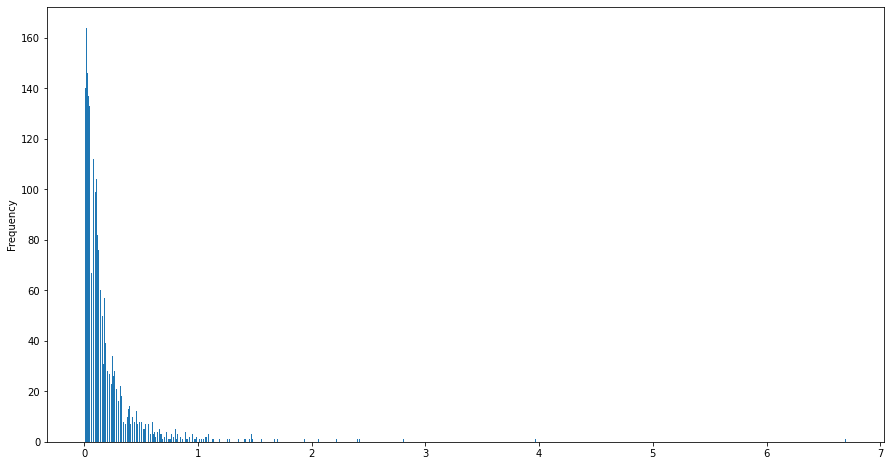

In [22]:
data.query('user_score == "tbd"')['total_sales'].plot(kind = 'hist', bins = 1000, figsize = (15,8));

Да, эти игры не получили достаточного интереса покупателей, чтобы получить их оценку. Для целей нашего исследования, впрочем, разницы нет - уберём эти значения и изменим тип данных в таблице.

In [23]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)
data['user_score'] = data['user_score'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


Подход к пропускам используем тот же, что и в оценках критиков - мы не можем заполнять эти пропуски ничем, и даже убрать мультиплатформенные игры мы из этого списка не сможем.

Зато мы сможем привести все цифровые значения к единому с критиками формату. Я думаю, это позволит нам лучше посмотреть на корреляцию чуть позже.

In [24]:
data.loc[(data['user_score'].isna() == False)&(data['user_score'] != 'tbd'),'user_score'] = \
data.loc[(data['user_score'].isna() == False)&(data['user_score'] != 'tbd'),'user_score'].astype(float) * 10
data['user_score'].value_counts()

78.0    324
80.0    290
82.0    282
83.0    254
85.0    253
       ... 
11.0      2
5.0       2
9.0       2
97.0      1
0.0       1
Name: user_score, Length: 95, dtype: int64

**Вывод:**
* Заполнены пропуски, где возможно
* Скорректированы типы данных, где возможно.
* Переименованы столбцы
* Данные оптимизированы для дальнейшего исследования.

### Исследовательский анализ данных.

**Вопросы к исследованию:**
* Сколько игр выпускалось в разные годы? Важны ли данные за все периоды?
* Как менялись продажи по платформам? За какой характерный срок появляются новые и исчезают старые платформы?
* По какому  периоду можно строить прогноз на 2017 год?
* Какие платформы лидируют по продажам, растут или падают?
* Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков? Есть ли корреляция между отзывами и продажами? Проверить для  нескольких платформ. 
* Выделяются ли жанры с высокими и низкими продажами?

Начнём по порядку. Построю график по количеству разных игр по годам.

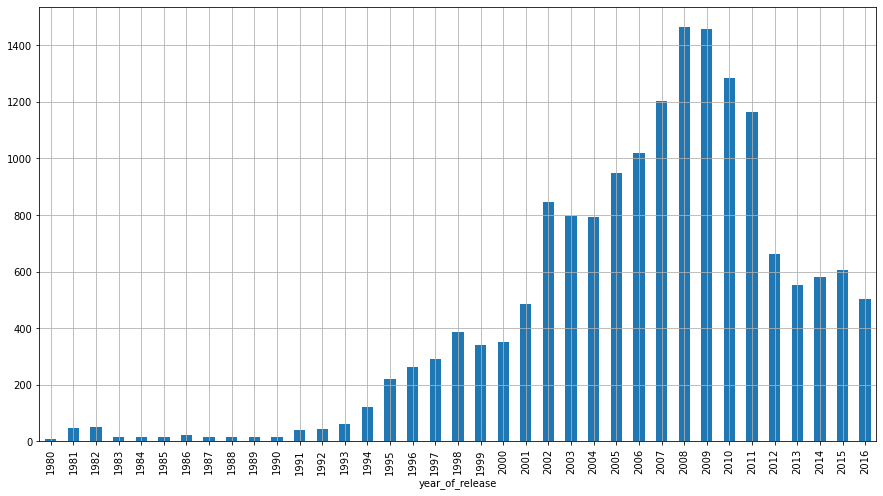

In [25]:
data.groupby('year_of_release')['name'].count()\
.plot(kind = 'bar', x = 'year_of_release', y = 'name', grid = True, figsize = (15,8));

Планку в сто игр в год пробили только в 1994. Другие заметные скачки - в 2002, 2007, 2008. После пикового 2008 количество выпускаемых игр просело. Финансовый кризис и его отголоски?

Данными до 1994 в целом можно пренебречь.

Теперь взгляну на платформы. Как они живут? Предположу, что должна быть картина, похожая на нормальное распределение, смещенное чуть влево: консоль выходит, сначала - дефицит, потом насыщение, потом пик, потом спад интереса, потом - новая консоль. Посмотрим!

Сделаю сводную таблицу продаж по платформе за год, построю график.

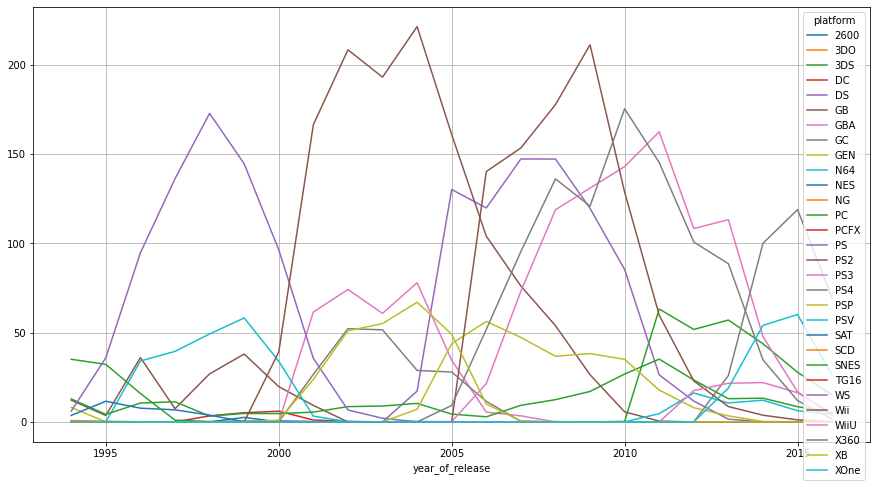

In [26]:
data_act = data.query('year_of_release > 1993')
data_act.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
.fillna(0).plot(grid = True, figsize = (15,8));

Многовато мешанины. Оставлю 10 платформ.

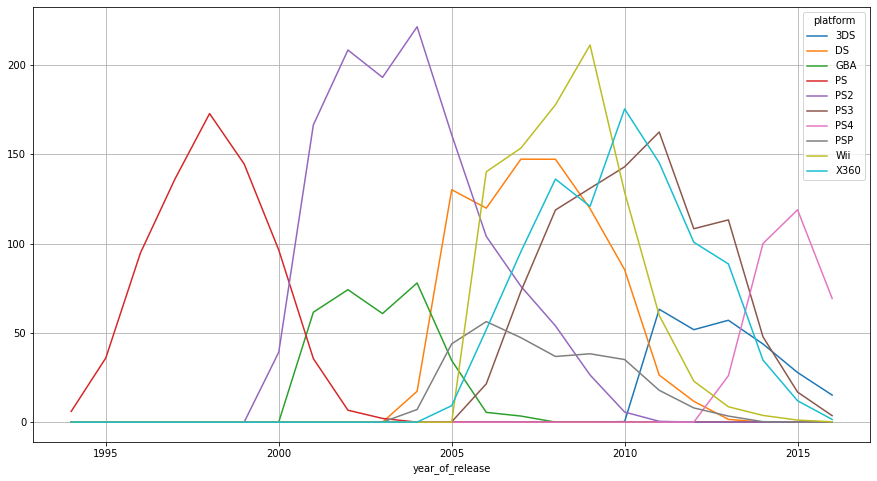

In [27]:
top_platforms = data_act.groupby('platform')['total_sales'].sum()\
.sort_values(ascending = False)

data_act.query('platform in @top_platforms.head(10).index.tolist()')\
.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
.fillna(0).plot(grid = True, figsize = (15,8));

Гораздо нагляднее. В целом ожидаемая картинка наблюдается - хотя зачастую с двумя пиками популярности.  

Также видно, что мобильные консоли живут подольше (DS, PSP, 3DS). Вернее, жили - они все теряют популярность с развитием мобильного гейминга на смартфонах.  



Выведу для каждой платформы статистическую информацию о распределении игр по годам выхода - увидим первые и последние годы выхода, а также пик платформы с точки зрения количества выходивших игр.

In [28]:
for platform_name in data_act['platform'].unique():
    print(platform_name,'\n', data_act.query('platform == @platform_name')['year_of_release'].describe(),'\n')

Wii 
 count    1320.000000
mean     2008.959848
std         1.539195
min      2006.000000
25%      2008.000000
50%      2009.000000
75%      2010.000000
max      2016.000000
Name: year_of_release, dtype: float64 

GB 
 count      68.000000
mean     1998.441176
std         2.017700
min      1994.000000
25%      1997.000000
50%      1999.000000
75%      2000.000000
max      2001.000000
Name: year_of_release, dtype: float64 

DS 
 count    2150.000000
mean     2008.199070
std         1.699204
min      2004.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2013.000000
Name: year_of_release, dtype: float64 

X360 
 count    1262.000000
mean     2009.873217
std         2.446528
min      2005.000000
25%      2008.000000
50%      2010.000000
75%      2011.000000
max      2016.000000
Name: year_of_release, dtype: float64 

PS3 
 count    1331.000000
mean     2010.829452
std         2.447384
min      2005.000000
25%      2009.000000
50%      2011.000000
75%      2013

Стали видны неочевидные потенциальные ошибки:
* Выход игры на Dreamcast в 2008 году
* Выход игры на Atari 2600 в 1999 году
* Выход игры на 3DS в 2000 году

Посмотрим, что это за игры.

In [29]:
data_act[(data_act['platform'] == 'DC')].sort_values(by = 'year_of_release', ascending = False).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14005,Pia Carrot e Youkoso!! 2.5,DC,2008,Adventure,0.0,0.0,0.04,0.0,NaN,NaN,NaN,0.04
15995,Triggerheart Exelica,DC,2007,Shooter,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02
6040,"Sakura Wars 4: Koi Seyo,Otome",DC,2002,Adventure,0.0,0.0,0.29,0.0,NaN,NaN,NaN,0.29
8903,Shenmue II,DC,2001,Adventure,0.0,0.0,0.15,0.0,88.0,94.0,T,0.15
13930,Gundam Battle Online,DC,2001,Action,0.0,0.0,0.04,0.0,NaN,NaN,NaN,0.04


In [30]:
data_act[(data_act['platform'] == '2600')].sort_values(by = 'year_of_release', ascending = False).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
609,Space Invaders,2600,1999,Shooter,2.36,0.14,0.0,0.03,NaN,NaN,NaN,2.53


In [31]:
data_act[(data_act['platform'] == '3DS')].sort_values(by = 'year_of_release').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15336,Mario Tennis,3DS,2000,Sports,0.00,0.00,0.02,0.00,NaN,NaN,NaN,0.02
5873,Harvest Moon: The Tale of Two Towns,3DS,2010,Simulation,0.28,0.00,0.00,0.02,NaN,NaN,NaN,0.30
16686,Outdoors Unleashed: Africa 3D,3DS,2011,Sports,0.01,0.00,0.00,0.00,NaN,NaN,T,0.01
5727,Bust-A-Move Universe,3DS,2011,Puzzle,0.08,0.15,0.06,0.03,49.0,48.0,E,0.32
12484,Nicola Kanshuu: Model * Oshare Audition 2,3DS,2011,Action,0.00,0.00,0.06,0.00,NaN,NaN,NaN,0.06


* Pia Carrot e Youkoso!! 2.5 вышла в 2001 году
* Space Invaders вышла в 1974 году
* Mario Tennis выходил в 2000 году на Nintendo 64, на 3DS он вышел в 2012

Исправим.

In [32]:
data_act.loc[(data_act['name'] == 'Pia Carrot e Youkoso!! 2.5')&(data_act['platform'] == 'DC'),'year_of_release'] = 2001
data_act.loc[(data_act['name'] == 'Space Invaders')& (data_act['platform'] == '2600'),'year_of_release'] = 1974
data_act.loc[(data_act['name'] == 'Mario Tennis')&(data_act['platform'] == '3DS'),'year_of_release'] = 2012

changed_years_games = ['Pia Carrot e Youkoso!! 2.5','Space Invaders','Mario Tennis']

data_act.query('name in @changed_years_games')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
609,Space Invaders,2600,1974,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53
682,Mario Tennis,N64,2000,Sports,0.78,0.40,1.06,0.07,NaN,NaN,NaN,2.31
1710,Mario Tennis,GB,2000,Sports,0.50,0.18,0.44,0.06,NaN,NaN,NaN,1.18
4263,Space Invaders,SNES,1994,Shooter,0.00,0.00,0.46,0.00,NaN,NaN,NaN,0.46
8579,Space Invaders,N64,1999,Shooter,0.13,0.03,0.00,0.00,NaN,NaN,NaN,0.16
10382,Space Invaders,GBA,2002,Shooter,0.08,0.03,0.00,0.00,NaN,NaN,NaN,0.11
12179,Mario Tennis,Wii,2010,Sports,0.00,0.06,0.00,0.01,NaN,NaN,E,0.07
14005,Pia Carrot e Youkoso!! 2.5,DC,2001,Adventure,0.00,0.00,0.04,0.00,NaN,NaN,NaN,0.04
15336,Mario Tennis,3DS,2012,Sports,0.00,0.00,0.02,0.00,NaN,NaN,NaN,0.02


Теперь видны и причины ошибок - закрались данные от других платформ. 

Теперь взглянем на стационарные консоли, сменявшие друг друга - PS - PS2 - PS3 - PS4, XBOX - XBOX360 - XBOX ONE. Так сможем посмотреть, как именно сменяются поколения и сколько одно поколение "живёт".

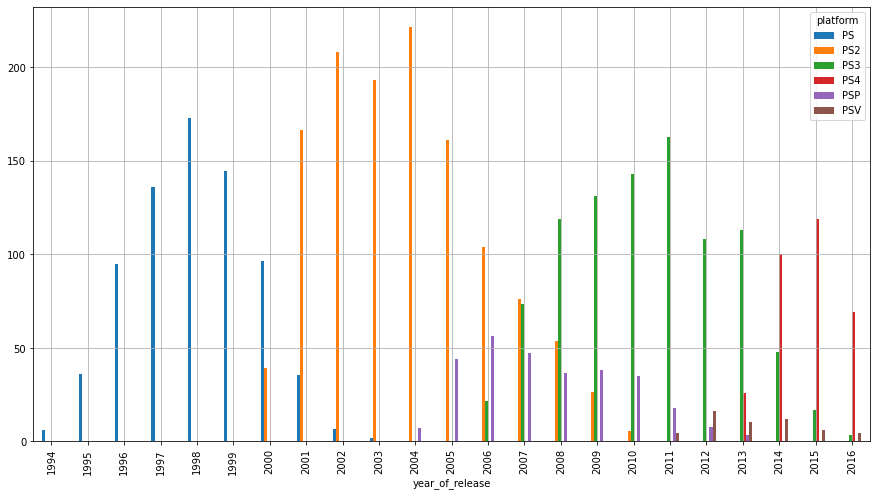

In [33]:
data_act[data_act['platform'].str.contains ('PS') == True]\
.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
.fillna(0).plot(kind = 'bar', grid = True, figsize = (15,8));

Во-первых, ещё раз поаплодируем PSP за долгую жизнь и наше счастливое детство. Спасибо за всё, легенда!  


Во-вторых, новая консоль появляется в момент, когда текущая уже преодолела пик и начинается спад.   
От поколения к поколению, начиная с PS2 видно уменьшение объёмов продаж.  
Динамика PS3 и PS4 очень схожа (напомню, данные за 2016 - неполные.   

Проверим на консолях Майкрософт.

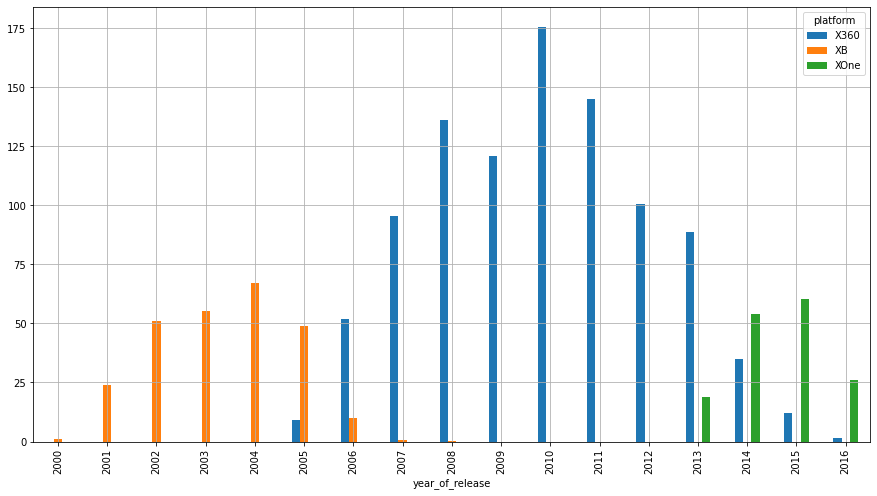

In [34]:
ms_consoles = ['XB','X360','XOne']
data_act.query('platform in @ms_consoles')\
.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
.fillna(0).plot(kind = 'bar', grid = True, figsize = (15,8));

XBOX360 оказал гораздо больше давления на Сони, чем первое поколение. Посмотрим на них вместе!

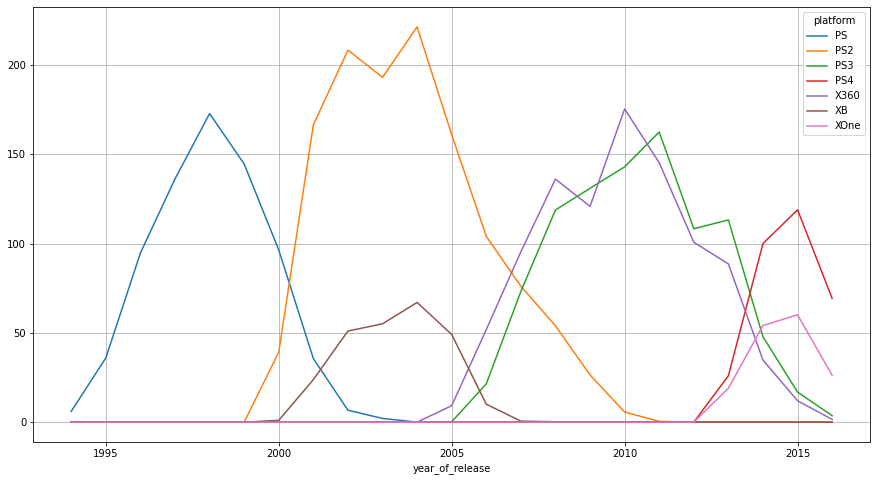

In [35]:
sony_big_consoles = ['PS', 'PS2', 'PS3', 'PS4']
data_act.query('platform in @ms_consoles | platform in @sony_big_consoles')\
.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
.fillna(0).plot(grid = True, figsize = (15,8));

Красиво! Майкрософт удалось навязать серъёзную борьбу Сони благодая XBOX360, но в текущем поколении они эту борьбу с треском проигрывают. 
А что там ПК? Добавим их в этот график.

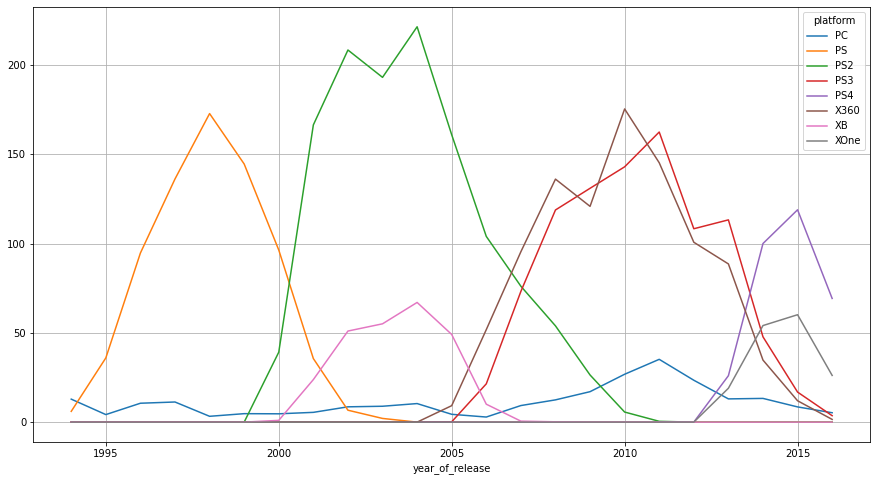

In [36]:
sony_big_consoles = ['PS', 'PS2', 'PS3', 'PS4']
data_act.query('platform in @ms_consoles | platform in @sony_big_consoles | platform == "PC"')\
.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
.fillna(0).plot(grid = True, figsize = (15,8));

Продажи игр на ПК очень стабильны. Нельзя упускать их из виду! Хотя консольный гейминг кратно популярнее.

Ну и главное - из всех этих графиков мы видим, что от "рождения" до "смерти" консоли - 10 лет, с пиком на 4-6 год жизни. 

Теперь посмотрим на динамику по платформам. Какие из них сейчас показывают лучшие цифры продаж?  

*А сейчас - это когда?*   

За точку отсчёта возьму 2012 год: прошлое поколение консолей уже вступило в необратимый спад, актуальное поколение набирает силу.

In [37]:
recent_sales = data[data['year_of_release'] > 2011]\
.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').fillna(0)
recent_sales

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.76,11.67,23.45,108.28,0.00,7.95,16.19,22.94,17.56,100.72,0.00
2013,57.04,1.54,13.01,113.25,25.99,3.38,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,47.76,100.00,0.24,12.16,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


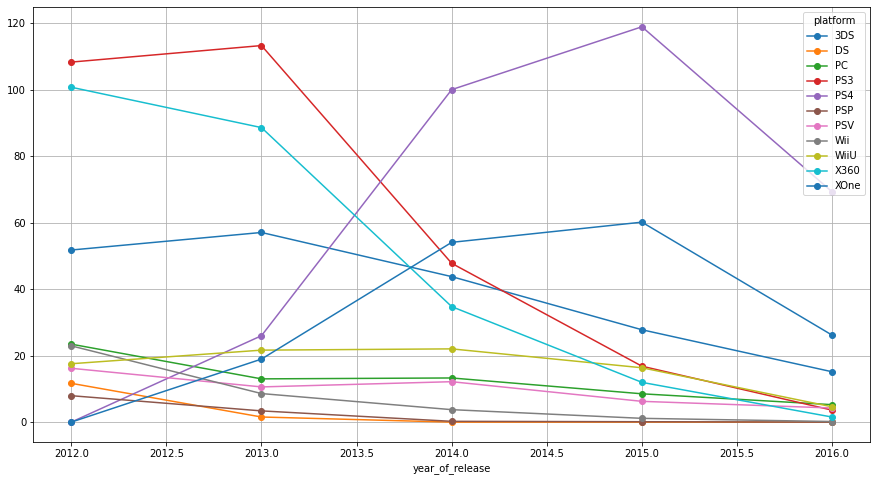

In [38]:
recent_sales.plot(grid = True, figsize = (15,8), style = 'o-');

Помимо приставок Сони и Майкрософт видим здесь приставки Нинтендо - Wii, WiiU, DS, 3DS. WiiU "не взлетела - продажи на четвертый год ниже, чем на третий. Остальные платформы "умерли", кроме 3DS - магия Нинтендо. Они единственные продают больше мобильных игр, чем "стационарных".  

Итого платформы:  
* Актуальны, но скоро "умрут" - PS3, XBOX360.
* Выходят на пик популярности - PS4, XBOX ONE.
* Вечно "живые" - PC, 3DS. 

Остальные не рассматриваем.

**Выводы:**  

Срок жизни платформы - 10 лет, за исключением ПК и мобильных платформ.  
Период анализа для построения прогноза - начиная с 2012.
На текущий момент актуальны три группы платформ:

* "Живые мертвецы" (прошли пик популярности, продажи ненулевые, но к нулю активно стремятся) - PS3, XBOX360.
* "Молодые" (выходят на пик популярности) - PS4, XBOX ONE.
* Вечно "живые" - PC, 3DS. 


Как распределяются продажи игр внутри платформы? Построим боксплот по каждой из топ-10 платформ.

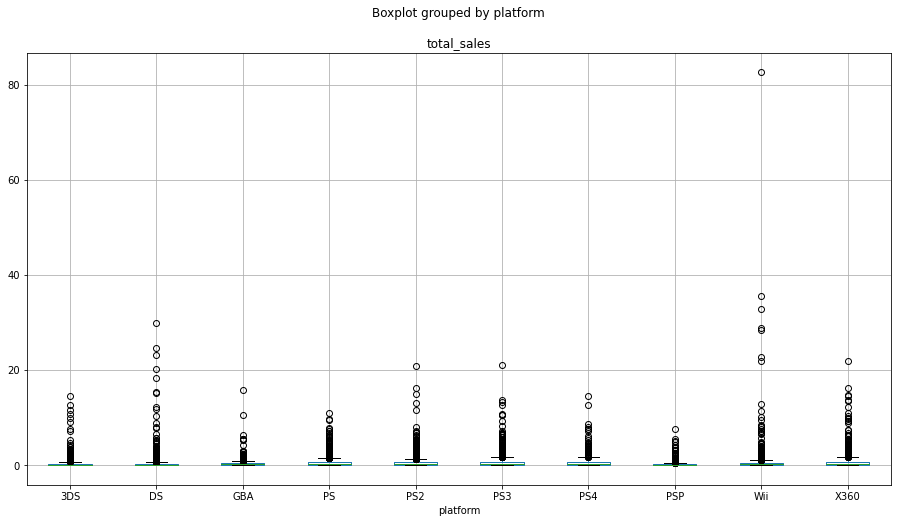

In [39]:
box_data = data_act.query('platform in @top_platforms.head(10).index.tolist()')
box_data.boxplot('total_sales', by='platform', figsize = (15,8));

Хочется взглянуть поближе. Очевидно, что основные "манимейкеры" - это выбросы. Но интересно, что же происходит ближе к статистически значимому интервалу? И где он? И какой он у каждой платформы?

In [40]:
print('All platforms total sales stats \n', box_data['total_sales'].describe(percentiles = [.25,.5,.75,.90,.99]),'\n')
for platform_name in top_platforms.head(10).index.tolist():
    print(platform_name,'total sales stats \n',box_data[box_data['platform'] == platform_name]['total_sales'].describe(percentiles = [.25,.5,.75,.90,.99]),'\n')

All platforms total sales stats 
 count    12364.000000
mean         0.549689
std          1.575278
min          0.000000
25%          0.070000
50%          0.180000
75%          0.490000
90%          1.220000
99%          5.623700
max         82.540000
Name: total_sales, dtype: float64 

PS2 total sales stats 
 count    2161.000000
mean        0.581106
std         1.137927
min         0.000000
25%         0.080000
50%         0.230000
75%         0.560000
90%         1.470000
99%         4.586000
max        20.810000
Name: total_sales, dtype: float64 

X360 total sales stats 
 count    1262.000000
mean        0.769746
std         1.615674
min         0.010000
25%         0.110000
50%         0.280000
75%         0.757500
90%         1.809000
99%         8.942100
max        21.820000
Name: total_sales, dtype: float64 

PS3 total sales stats 
 count    1331.000000
mean        0.705973
std         1.391749
min         0.000000
25%         0.110000
50%         0.270000
75%         0.75000

Отличные данные для ABC-анализа впоследствии. 

**Выводы о распределении игр:**
Независимо от платформы, основная часть игр (75-ый квантиль) продаётся тиражом до 500 тыс копий. Это значение незначительно меняется от платформы к платформе.  

По 75-ому квантилю выбивается PS4 - 75% игр продались тиражом до 730 тыс копий. Видимо, из-за новизны платформы ассортимент игр невысок и поэтому игроки покупают хоть что-нибудь.   
Это предположение подтверждает и PS первого поколения - она недолго "прожила" и поэтому вероятно не успела "наплодить" много игр-пустышек.


При прогнозе продаж следует особое внимание уделить идентификации "выбросов". 

Теперь следует взглянуть на корреляцию между отзывами игроков, оценками критиков и продажами. Сделаем список топ-5 платформ по продажам, и внутри каждой платформы посчитаем коэффициенты корреляции и цифр продаж. Посмотрим, меняется ли это от платформы к платформе и можем ли мы транслировать выводы на выделенные нами актуальные группы?

Для анализа исключим также пропуски в рейтингах и TBD.

In [41]:
corr_table = data[['platform', 'user_score', 'critic_score','total_sales']]\
.query('platform in @top_platforms.head(5).index.tolist() & user_score != "tbd"').dropna().reset_index(drop=True)
corr_table['user_score'] = corr_table['user_score'].astype(int)

for platform_name in top_platforms.head(5).index.tolist():
    corr_table_platform = corr_table[corr_table['platform'] == platform_name]
    print(platform_name,'total sales correlation \n',corr_table_platform.corr()['total_sales'],'\n')

PS2 total sales correlation 
 user_score      0.16942
critic_score    0.38922
total_sales     1.00000
Name: total_sales, dtype: float64 

X360 total sales correlation 
 user_score      0.110412
critic_score    0.389513
total_sales     1.000000
Name: total_sales, dtype: float64 

PS3 total sales correlation 
 user_score      0.143252
critic_score    0.427875
total_sales     1.000000
Name: total_sales, dtype: float64 

Wii total sales correlation 
 user_score      0.110151
critic_score    0.169668
total_sales     1.000000
Name: total_sales, dtype: float64 

DS total sales correlation 
 user_score      0.139453
critic_score    0.230941
total_sales     1.000000
Name: total_sales, dtype: float64 



**Выводы по коэффициенту корреляции:**
* Между продажами и оценками критиков коэффициент корреляции для платформ Сони и Майкрософт 0,39 - 0,43 - корреляция есть, но умеренная. Это факторы, которые стоит принимать во внимание при построении прогноза, но не с большим весом, и только для соответствующих платформ.
* Для платформ Нинтендо картинка другая - оценки критиков коррелируют с продажами ещё меньше - 0,17-0,23. Корреляция совсем незначительная.
* Корреляция между отзывами пользователей и продажами игры - низкая для всех платформ (0,11-0,17).

Проверим, сохраняются ли эти выводы для ПК - самой стабильной и долгоживучей платформы.

In [42]:
corr_table_PC = data_act[['platform', 'user_score', 'critic_score','total_sales', 'year_of_release']]\
.query('platform == "PC" & user_score != "tbd"')\
.dropna().reset_index(drop=True).drop(columns=['platform','year_of_release'])
corr_table_PC['user_score'] = corr_table_PC['user_score'].astype(int) 
corr_table_PC.corr()['total_sales']


user_score     -0.000528
critic_score    0.256363
total_sales     1.000000
Name: total_sales, dtype: float64

Оценка критиков также незначительно коррелирует (сопоставимо с Нинтендо). С пользовательскими оценками корреляция и вовсе нулевая - что подтверждает, что этот параметр при построении прогноза продаж учитывать не нужно. 

Построим диаграмы рассеяния для топ-5 платформ.

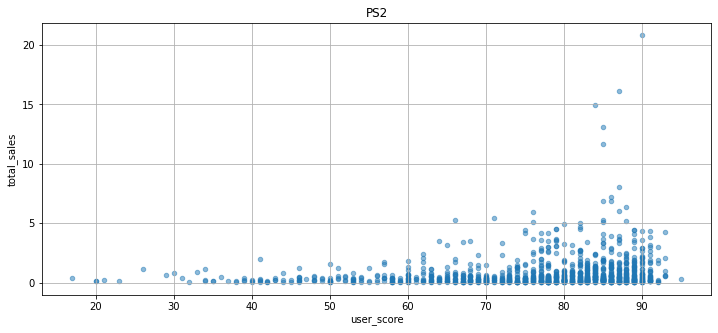

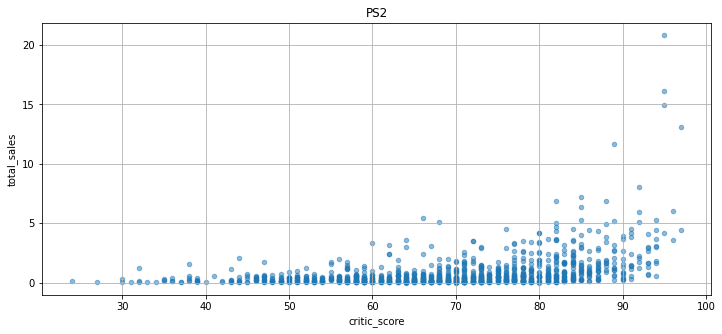

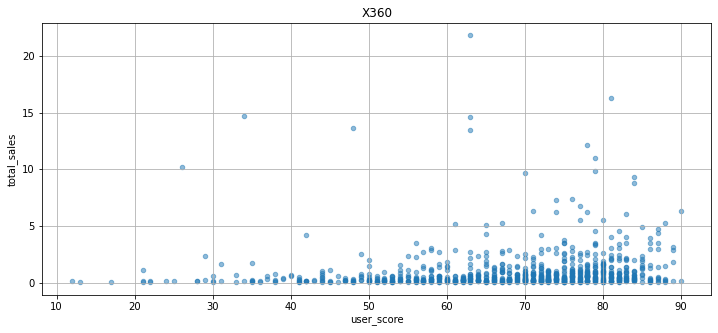

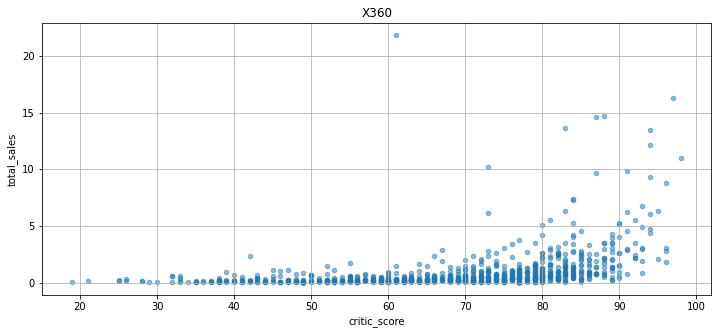

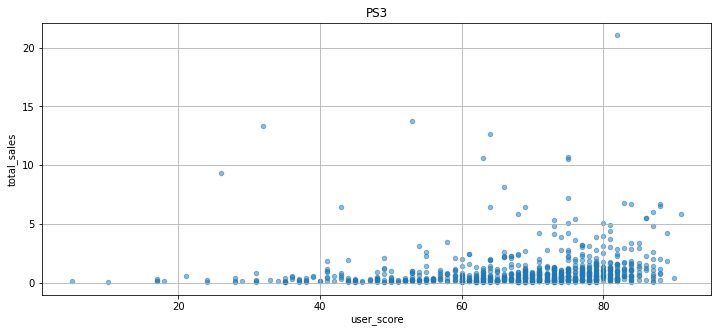

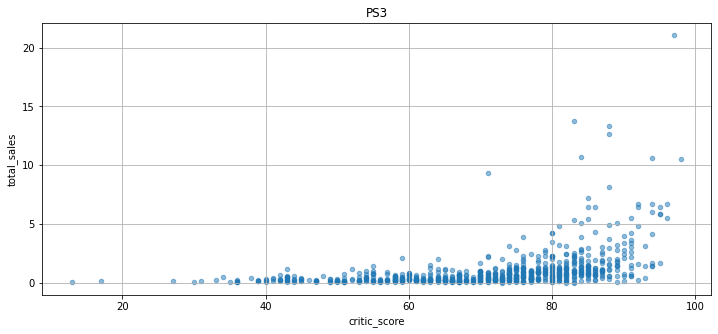

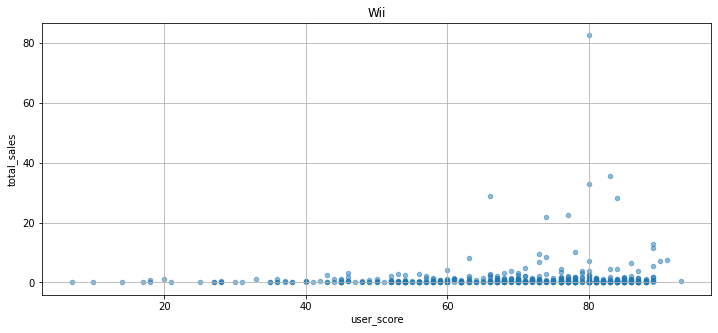

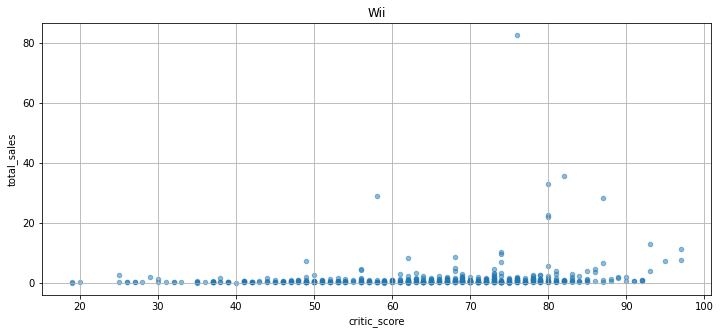

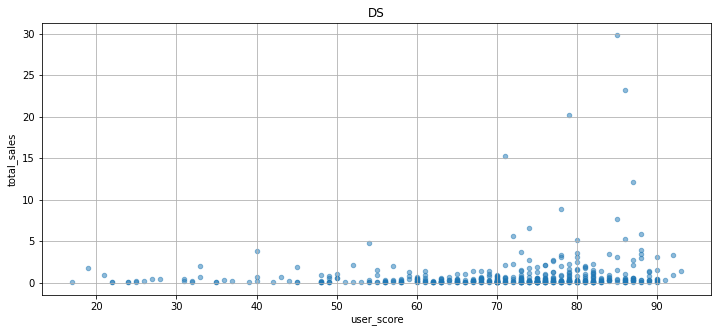

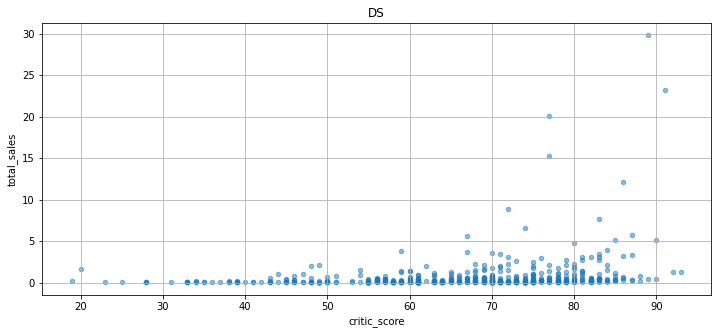

In [43]:
for platform_name in top_platforms.head(5).index.tolist():
    corr_table_platform = corr_table[corr_table['platform'] == platform_name].drop(columns = 'platform')
    for column in corr_table_platform:
        if column != 'total_sales':
            corr_table_platform.plot\
            (y='total_sales',x=column,kind='scatter',title = platform_name, figsize=(12,5), alpha = 0.5, grid = True)

Только визуально подтверждают нам те выводы, что мы сделали из таблиц. Ну, спасибо им за это.

Можно приступить к изучению жанров.

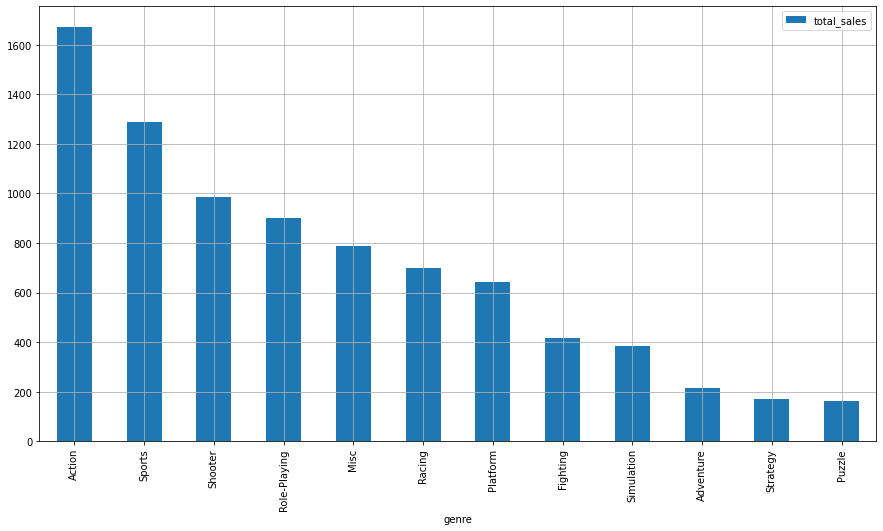

In [44]:
genre_sale_pivot = data_act.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum')\
.sort_values(by = 'total_sales', ascending = False)
genre_sale_pivot.plot(kind = 'bar', grid = True, figsize = (15,8));

Лучше всего продаются экшен-игры, спортивные, шутеры, РПГ и "прочее". Хуже всего - стратегии и паззлы.   

Гипотеза про стратегии и паззлы - они выходят на не самых популярных платформах. Проверим.

In [45]:
data_act.query('genre in @genre_sale_pivot.tail(2).index.tolist()')\
.pivot_table(index = 'platform', values = 'total_sales', columns = 'genre', aggfunc = 'sum').fillna(0)\
.sort_values(by = ['Strategy'], ascending = False)

genre,Puzzle,Strategy
platform,,
PC,0.91,45.72
PS,12.06,21.78
PS2,5.94,15.08
DS,82.48,14.87
PSP,5.45,10.47
N64,3.39,10.34
X360,0.87,10.01
GB,4.90,7.88
GBA,12.81,7.46


Вполне легитимная гипотеза. За исключением DS - но скорее всего, там нет экшенов и спорта. Паззл-машины!

Много стратегий продалось на PS и PS2 - интересно!

Теперь посмотрим, как меняются топ-5 жанров в популярности по годам начиная с 2012 (который мы выбрали отправной датой для анализа)

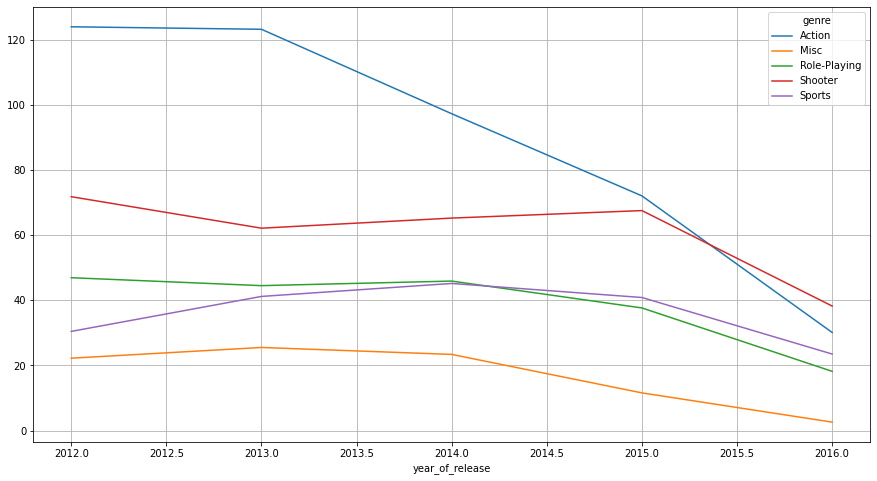

In [46]:
data_act.query('year_of_release > 2011 & genre in @genre_sale_pivot.head(5).index.tolist()')\
.pivot_table(index = 'year_of_release', values = 'total_sales', columns = 'genre', aggfunc = 'sum').fillna(0)\
.plot(grid = True, figsize = (15,8));

Посмотрим данные по прибыльности игр внутри жанров с точки зрения дохода на одну игру.

In [47]:
data_act.query('year_of_release > 2011 & genre in @genre_sale_pivot.head(10).index.tolist()')\
.groupby('genre')['total_sales'].agg(['count','sum','mean','median',]).sort_values(by='median', ascending = False)\
.style.format({'mean':'{:.2f}','median':'{:.2f}','sum':'{:.0f}'})

,count,sum,mean,median
genre,,,,
Shooter,238,305,1.28,0.43
Sports,269,181,0.67,0.24
Platform,85,61,0.72,0.21
Role-Playing,372,193,0.52,0.14
Racing,116,54,0.46,0.14
Fighting,109,44,0.41,0.13
Action,1041,446,0.43,0.12
Misc,193,85,0.44,0.12
Simulation,81,35,0.44,0.12


* Игры прочих жанров держатся стабильно. 
* РПГ и спорт конкурируют друг с другом. 
* Шутеры и экшены - в отрыве. 
* Продажи игр падают в целом, но экшены упали сильнее.
* С точки зрения продаж на одну игру самые интересные жанры - шутеры: средний шутер продастся в 1.8 раза лучше любой другой игры.


Подведём итог исследовательского анализа.

**Выводы:** 

* Срок жизни платформы - 10 лет, за исключением ПК и мобильных платформ.  
* Период анализа для построения прогноза - начиная с 2012.
* На текущий момент актуальны три группы платформ:
  * "Живые мертвецы" (прошли пик популярности, продажи ненулевые, но к нулю активно стремятся) - PS3, XBOX360.
  * "Молодые" (выходят на пик популярности) - PS4, XBOX ONE.
  * Вечно "живые" - PC, 3DS. 
* Независимо от платформы, основная часть игр (75-ый квантиль) продаётся тиражом до 500 тыс копий. Это значение меняется от платформы к платформе.  
При прогнозе продаж следует особое внимание уделить идентификации "выбросов"   

* Между продажами и оценками критиков  для платформ Сони и Майкрософт есть умеренная корреляция. Это факторы, которые стоит принимать во внимание при построении прогноза, но не с большим весом, и только для соответствующих платформ.
* Для платформ Нинтендо и ПК корреляция оценки критиков и продаж совсем незначительная.
* Корреляция между отзывами пользователей и продажами игры - низкая для всех платформ. 
* Топ-5 жанров по продажам:
  * Экшен
  * Спорт
  * РПГ
  * Шутеры
  * Прочие
* Игры "прочих жанров" держатся стабильно год от году. 
* РПГ и спорт конкурируют друг с другом за третье место в продажах,  шутеры и экшены - с отрывом на 1-2 месте. 
* Продажи игр падают в целом, экшены упали в продажах сильнее прочих жанров.
* С точки зрения продаж на одну игру самые интересные жанры - шутеры: средний шутер продастся в 1.8 раза лучше любой другой игры.

### Составление портретов пользователей по регионам

Определю для каждого региона (NA, EU, JP):

* Самые популярные платформы (топ-5).
* Самые популярные жанры (топ-5).
* Влияние рейтинга ESRB. 

На основе этой информации будут составлены портреты пользователей.

In [48]:
def region_func (dataframe, parameter, period):
    region_list = ['NA','EU','JP']
    for region in region_list:
        dataframe.pivot_table(index = parameter, values = ''.join([region.lower(),'_sales']),aggfunc = 'sum')\
          .sort_values(by =''.join([region.lower(),'_sales']), ascending = False).reset_index()\
          .plot(kind = 'bar', x = parameter, y = ''.join([region.lower(),'_sales']), grid = True, figsize = (12,5),\
                title = ''.join([region,' ', period,' sales by ', parameter]))

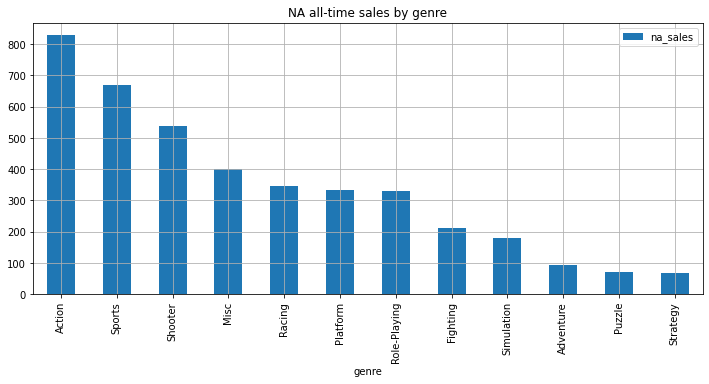

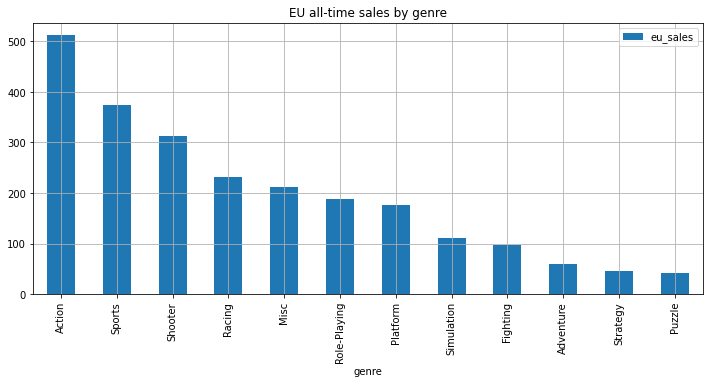

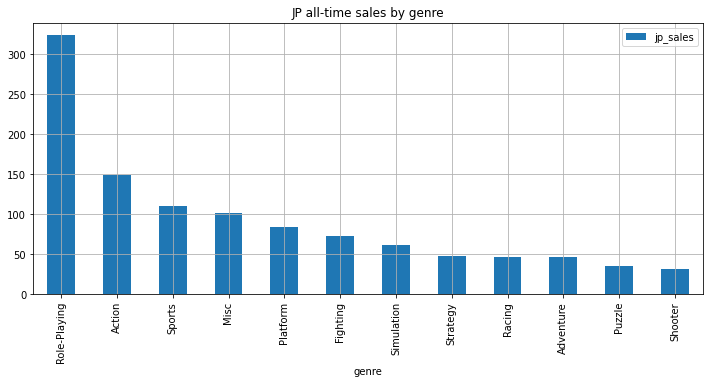

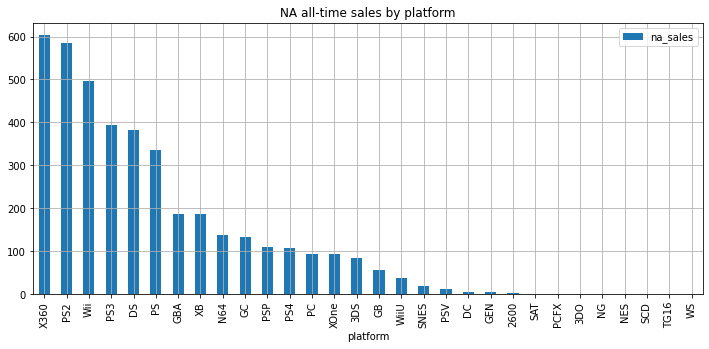

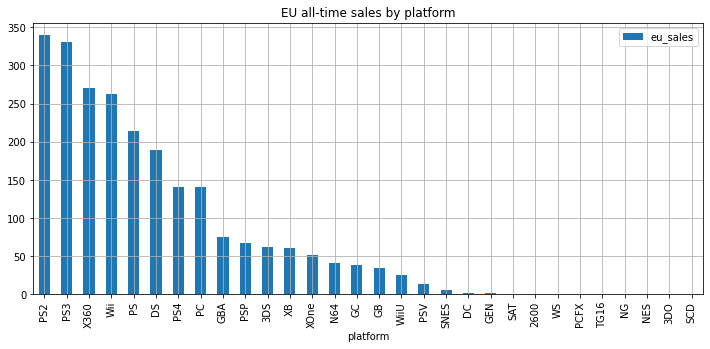

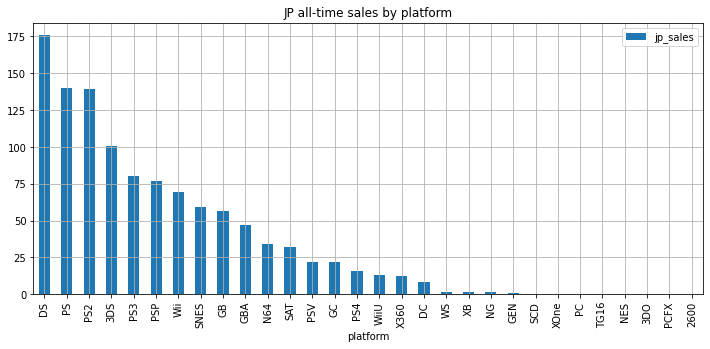

In [49]:
region_func(data_act,'genre','all-time')
region_func(data_act,'platform', 'all-time')

**Самые популярные жанры по регионам (топ-5):**

* Северная Америка:  
  * Экшен
  * Спорт
  * Шутер
  * Прочее
  * Гонки
  
* Европа:
  * Экшен
  * Спорт
  * Шутер
  * Гонки
  * Прочее  
  
* Япония:
  * Ролевые игры
  * Экшен
  * Спорт
  * Прочее
  * Платформеры

Европа и США очень похожи. Япония - немного особняком: ролевые игры и платформеры в топ-пять, шутеры - не в фаворе. 

**Самые популярные платформы по регионам (топ-5):**

* Северная Америка:  
  * XBOX 360
  * PS2
  * Wii
  * PS3
  * DS
  
* Европа:
  * PS2
  * PS3
  * XBOX 360
  * Wii
  * PS  
  
* Япония:
  * DS
  * PS
  * PS2
  * 3DS
  * PS3

* В северной Америке XBOX 360 популярнее чем любая прочая приставка. В своём поколении безоговорочно обыграл PS3.
* В Европе - похожий набор приставок, PS3 обошла XBOX 360 по продажам, но разрыв меньше, чем у XBOX с PS3 в северной Америке. И игроков на ПК больше, чем США и Японии. 
* Япония - отдельный мир. На ПК не играет вообще никто, DS и 3DS в топе. Так вот кто играет в Марио и Зельду!  
А самая популярная PS - первая.  
Что XBOX не в фаворе и все играют только на японских консолях, вообще и говорить не стоит.

Посмотрим на картину в выбранном периоде (2012-2016). Как выглядит картина там?

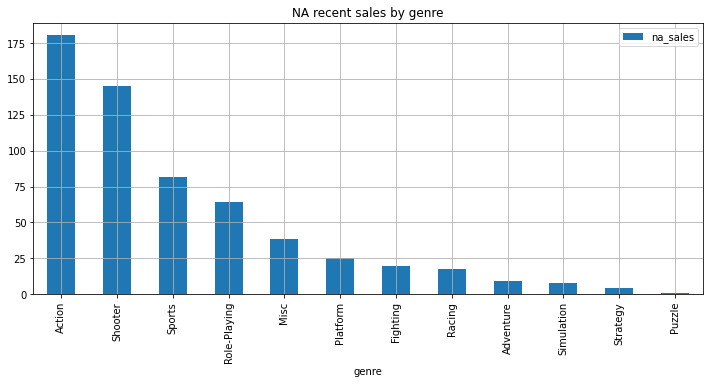

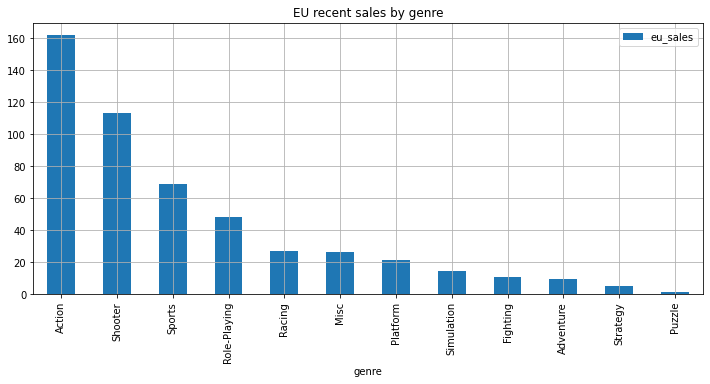

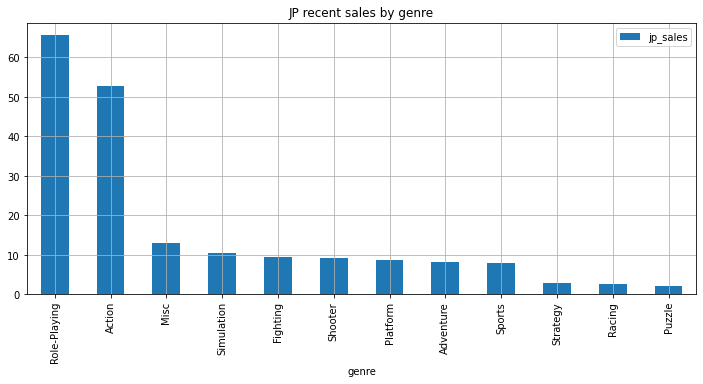

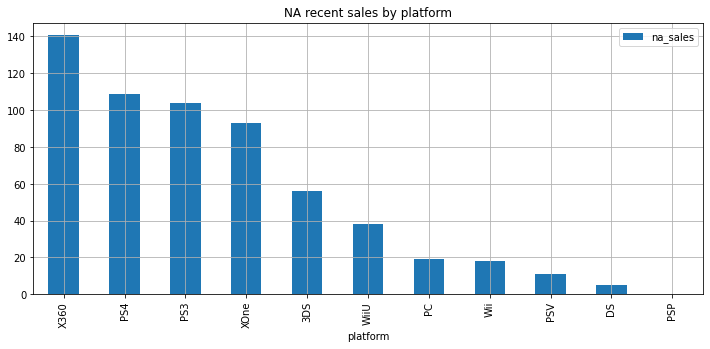

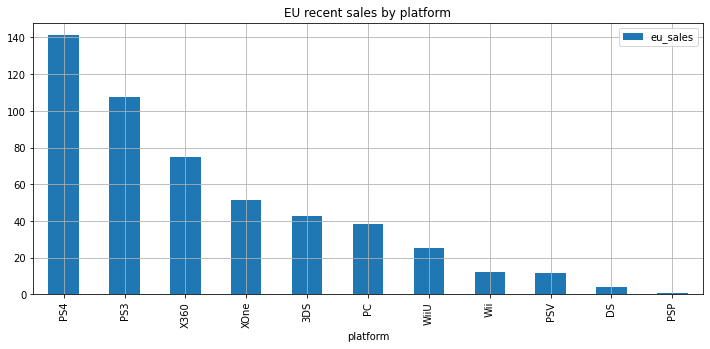

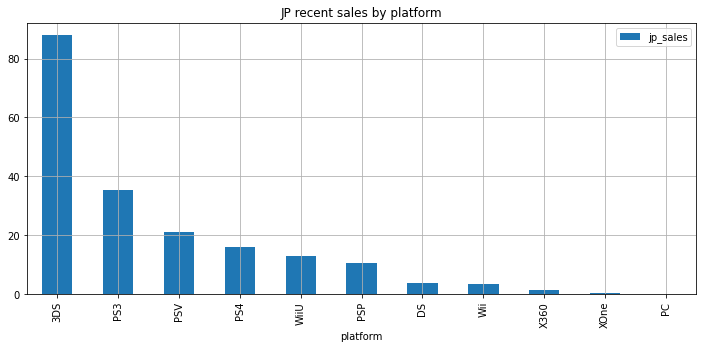

In [50]:
region_func(data_act.query('year_of_release > 2011'),'genre', 'recent')
region_func(data_act.query('year_of_release > 2011'),'platform', 'recent')

* В новом поколении PS4 обыгрывает XBOX даже в северной Америке.
* Смерть консолей прошлого поколения наступила почти везде - только в Японии PS3 не сдаёт позиций. 
* Удивительно, но там даже PS Vita показывает какие-то неплохие результаты по меркам всего мира. 

Картина по жанрам также немного изменилась:
* В северной Америке стали лучше продаваться RPG и намного хуже - гонки.
* В Европе гонки всё ещё в почёте, но уступили RPG.
* Первые топ-4 жанра в Европе и Америке идентичны.
* В Японии популярны RPG и экшены, остальное продаётся сильно хуже.

Теперь следует оценить влияние рейтинга ESRB. Какие они вообще бывают?

In [51]:
data_act['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Расшифруем значения:

* «EC» («Early childhood») — «Для детей младшего возраста»
* «E» («Everyone») — «Для всех»
* "K-A" ("Kids to Adults") — «Для всех»
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
* «T» («Teen») — «Подросткам»
* «M» («Mature») — «Для взрослых»
* «AO» («Adults Only 18+») — «Только для взрослых»
* «RP» («Rating Pending») — «Рейтинг ожидается»

Пропуски заменим на not_rated

In [52]:
data_act['rating'] = data_act['rating'].fillna('not_rated')

Также видим, что E и K-A - это одно и то же. Заменим на E/K-A - мы не знаем, в каком году изменилось обозначение, поэтому сохраним оба, но для подсчета логичнее цепляться за суть.

In [53]:
data_act.loc[(data_act['rating'] == 'E') |(data_act['rating'] == 'K-A'), 'rating'] = 'E/K-A'
data_act['rating'].unique()

array(['E/K-A', 'not_rated', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'],
      dtype=object)

Теперь посмотрим, как распределялись продажи в зависимости от рейтинга - за все время и за выбранный период.

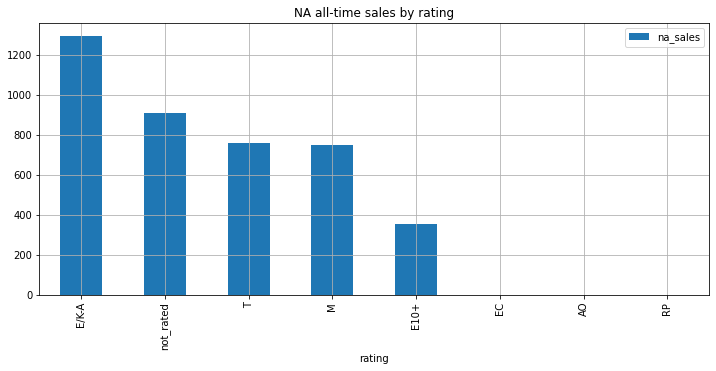

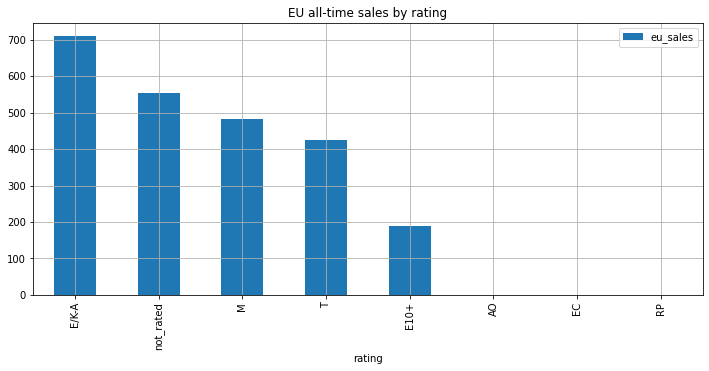

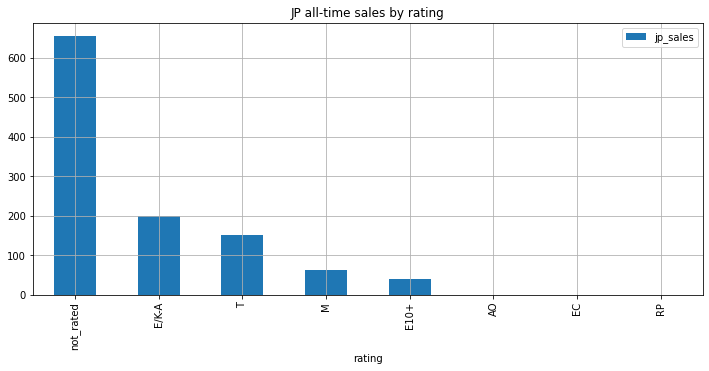

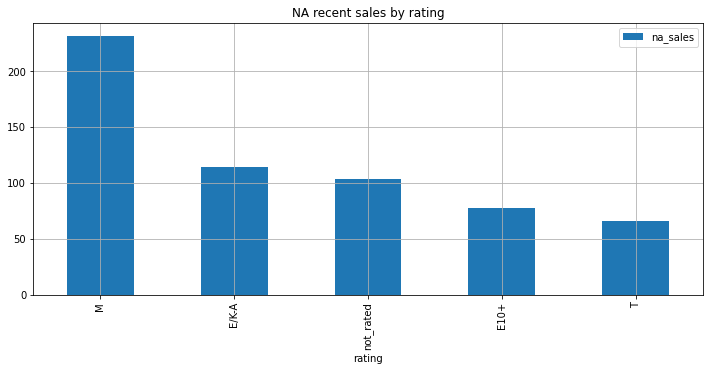

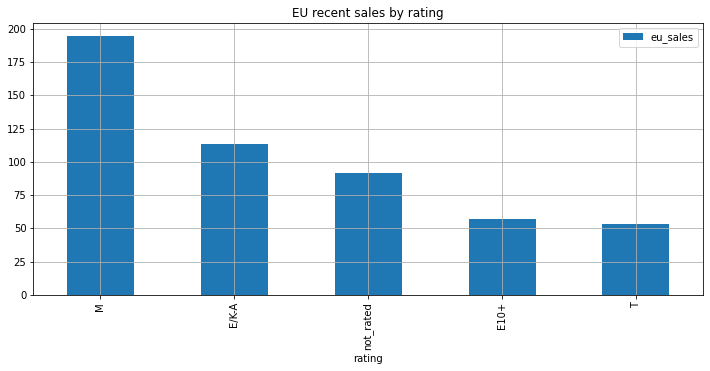

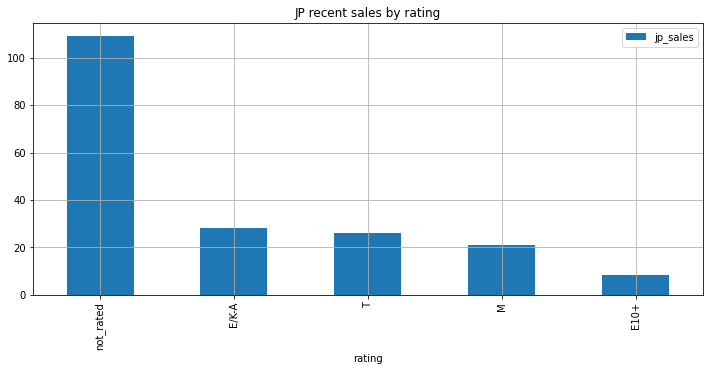

In [54]:
region_func(data_act,'rating', 'all-time')
region_func(data_act.query('year_of_release > 2011'),'rating', 'recent')

**Выводы:**
* Во всём мире значительная часть игр продаётся без рейтинга. 
* Если раньше основная часть игр продавалась с рейтингом E/K-A, то сейчас в Европе и северной Америке основные "мани-мейкеры" - игры с рейтингом M. Очевидно, если накладывать на жанры: с развитием визуальных технологий и запросом на реализм изображение насилия стало более востребованным.
* За последнее время игры с рейтингом AO вообще потеряли и так околонулевую популярность.
* Картины за весь период в северной Америке и Европе очень похожи (Teen и Mature меняются местами в топ-5).  
Картина за актуальный период идентична
* В Японии всё как всегда особняком. Ничего не изменилось - игры без рейтинга так и остаются с отрывом первыми.

**Актуальные портреты пользователей:**
* Северная Америка:
  * Скорее всего, ещё играет на XBOX 360, но будет обновляться. Скорее всего, на PS4.
  * Играет в экшены, шутеры, спорт.
  * Скорее всего, экшенам и шутерам, в которые он играет, присвоен рейтинг M.
* Европа:
  * Уже поменял свою консоль на PS4 - это касается и "иксбоксеров", и "сонибоев".
  * Играет в те же экшены, шутеры, спорт.
  * Скорее всего, экшенам и шутерам, в которые он играет, присвоен рейтинг M.
* Япония:
  * Скорее всего, играет на 3DS - в дороге.
  * Играет в ролевые игры ~~*(зеееельда)*~~ и экшены.
  * Скорее всего, игре, в которую он играет, не присвоен рейтинг.

### Проверка гипотез. 

**Гипотезы:**

* Средние пользовательские рейтинги платформ Xbox ONE и PC одинаковые
* Средние пользовательские рейтинги жанров Action и Sports разные

#### Гипотеза 1. Средние пользовательские рейтинги платформ Xbox ONE и PC одинаковые.
Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox ONE и PC одинаковые.  
Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox ONE и PC разные.

*Гипотеза о равенстве средних двух совокупностей, альтернативная гипотеза двусторонняя.*

In [55]:
xone = data_act[data_act['user_score'].isna() == False]\
.query('platform == "XOne"')['user_score']
pc = data_act[data_act['user_score'].isna() == False]\
.query('platform == "PC"')['user_score']

alpha = .05

results = st.ttest_ind(
    xone, 
    pc, 
    equal_var=False)
    
print('p-значение:', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.768315142911387e-06
Отвергаем нулевую гипотезу


**Вывод:** 
Среднее двух совокупностей, вероятнее всего, отличается - в среднем оценки игр на одной платформе были лучше, чем на другой.

Проверим на актуальной выборке: XBOX One - свежая консоль, может, картину для ПК портит много старых некачественных игр? 

In [56]:
xone = data_act[data_act['user_score'].isna() == False]\
.query('platform == "XOne" and year_of_release > 2011')['user_score']
pc = data_act[data_act['user_score'].isna() == False]\
.query('platform == "PC" and year_of_release > 2011')['user_score']

alpha = .05

results = st.ttest_ind(
    xone, 
    pc, 
    equal_var=False)
    
print('p-значение:', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.6206366351489752
Не получилось отвергнуть нулевую гипотезу


**Вывод:** 
В среднем оценки ***свежих игр*** на одной из двух платформ не лучше, чем на другой.

#### Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные.
Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports не отличаются.  
Альтернативная гипотеза: средние пользовательские рейтинги Action и Sports отличаются.  

*Гипотеза о равенстве средних двух совокупностей, альтернативная гипотеза двусторонняя.*

In [57]:
action = data_act[(data_act['user_score'].isna() == False)&(data_act['user_score'] != 'tbd')]\
.query('genre == "Action"')['user_score'].astype(int)
sports = data_act[(data_act['user_score'].isna() == False)&(data_act['user_score'] != 'tbd')]\
.query('genre == "Sports"')['user_score'].astype(int)

alpha = .05

results = st.ttest_ind(
    action, 
    sports, 
    equal_var=False)
    
print('p-значение:', results.pvalue)
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1148381879149927
Не получилось отвергнуть нулевую гипотезу


**Вывод:** 
Cредние пользовательские рейтинги жанров Action и Sports не отличаются.

## Общий вывод.

Был проведён анализ данных о продажах игр в разных регионах.  

### Предобработка данных.
- Определены столбцы с недостающими данными.
- Обработаны пропуски (часть данных дополнена исходя из данных датасета, часть данных осталась незаполненной)
- Скорректированы типы данных (где возможно)


Исследовательский анализ данных
Составление портретов пользователей по регионам
Проверка гипотез
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Анализ данных.
#### Исследовательский анализ данных
- Изучены и обработаны все показатели, обнаружены следующие существенные для построения прогноза моменты:
  * Срок жизни платформы - 10 лет, за исключением ПК и мобильных платформ.  
  * Период анализа для построения прогноза - начиная с 2012.
  * На текущий момент актуальны три группы платформ:
    * "Живые мертвецы" (прошли пик популярности, продажи ненулевые, но к нулю активно стремятся) - PS3, XBOX360.
    * "Молодые" (выходят на пик популярности) - PS4, XBOX ONE.
    * Вечно "живые" - PC, 3DS. 
  При построении прогноза необходимо делать основной фокус на последние две группы.
  * Независимо от платформы, основная часть игр (75-ый квантиль) продаётся тиражом до 500 тыс копий. Это значение меняется от платформы к платформе.  
  При прогнозе продаж следует особое внимание уделить идентификации "выбросов"   
  * Между продажами и оценками критиков  для платформ Сони и Майкрософт есть умеренная корреляция. Это факторы, которые стоит принимать во внимание при построении прогноза, но не с большим весом, и только для соответствующих платформ.
  * Для платформ Нинтендо и ПК корреляция оценки критиков и продаж совсем незначительная.
  * Корреляция между отзывами пользователей и продажами игры - низкая для всех платформ. 
  * Топ-5 жанров по продажам:
    * Экшен
    * Спорт
    * РПГ
    * Шутеры
    * Прочие
  * Игры "прочих жанров" держатся стабильно год от году. 
  * РПГ и спорт конкурируют друг с другом за третье место в продажах,  шутеры и экшены - с отрывом на 1-2 месте. 
  * Продажи игр падают в целом, экшены упали в продажах сильнее прочих жанров.
  * С точки зрения продаж на одну игру самые интересные жанры - шутеры: средний шутер продастся в 1.8 раза лучше любой другой игры.


    
#### Составление портретов пользователей по регионам

- Изучены географические различия в популярности жанров и платформ, сделаны следующие выводы:
  * В северной Америке XBOX 360 популярнее чем любая прочая приставка и в своём поколении безоговорочно обыграл PS3.
  * В Европе больший процент людей играет на ПК, чем где-либо ещё.
  * В Японии у ПК-гейминга околонулевая популярность, в топе продаж игры для мобильных приставок Nintendo DS и 3DS.
  * В новом поколении PS4 обыгрывает XBOX даже в северной Америке.
  * Смерть консолей прошлого поколения наступила почти везде, за исключением PS3 в Японии. 
  * В северной Америке относительно прошлых периодов стали лучше продаваться RPG и намного хуже - гонки.
  * В Европе также теряют популярность, но существенно медленнее. Как и в США гонки уступили в популярности RPG.
  * Первые топ-4 жанра в Европе и Америке за последнее время идентичны.
  * В Японии популярны RPG и экшены, игры остальных жанров продаются сильно хуже.
  * Во всём мире значительная часть игр продаётся без рейтинга ESRB. 
  * Если раньше основная часть игр продавалась с рейтингом E/K-A, то сейчас в Европе и северной Америке основные "мани-мейкеры" - игры с рейтингом M. 
  * Картины за весь период в северной Америке и Европе очень похожи (Teen и Mature меняются местами в топ-5).  Картина за актуальный период идентична
  * В Японии игры без рейтинга были и остаются наиболее популярными.  
  
  
- Составлены актуальные портреты пользователей:  
  
  * ***Североамериканец***:
    * Скорее всего, ещё играет на XBOX 360, но будет обновляться. Скорее всего, на PS4.
    * Играет в экшены, шутеры, спорт.
    * Скорее всего, экшенам и шутерам, в которые он играет, присвоен рейтинг M.
  * ***Европеец***:
    * Уже поменял свою консоль на PS4 - это касается и "иксбоксеров", и "сонибоев".
    * Играет в те же экшены, шутеры, спорт.
    * Скорее всего, экшенам и шутерам, в которые он играет, присвоен рейтинг M.
  * ***Японец***:
    * Скорее всего, играет на 3DS - в дороге.
    * Играет в ролевые игры и экшены.
    * Скорее всего, игре, в которую он играет, не присвоен рейтинг.
    
#### Проверка гипотез  
##### Гипотеза 1. Средние пользовательские рейтинги платформ Xbox ONE и PC одинаковые.

Отвергнута в исторической перспективе, потверждена в актуальный период. Предлагаю опираться на последний вывод в связи с разным сроком жизни платформ.

##### Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные.

Отвергнута, средние пользовательские рейтинги игр этих жанров близки.